# Regression

In [409]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')

In [410]:
rent_path = r"D:\BCAI_4\D_L\SEC\Sec_1\1- Neural Network\Task\Rent.csv"
try:
    df_rent = pd.read_csv(rent_path)
    print("Rent.csv file uploaded active.")
except FileNotFoundError:
    print(f"Error: File not found at specified path: {rent_path}")
    exit()

Rent.csv file uploaded active.


Target (Price)

In [411]:
target = df_rent.columns[-1]
X = df_rent.drop(target, axis=1)
y = df_rent[target]

In [412]:
numeric = X.select_dtypes(include=np.number).columns
categorical = X.select_dtypes(include='object').columns

Dropping duplicate rows from dataset

In [413]:

before_drop = df_rent.shape[0]
df_rent.drop_duplicates(inplace=True)
after_drop = df_rent.shape[0] 

print(f"Duplicate rows removed: {before_drop - after_drop}")
print(f"Remaining rows: {after_drop}")

Duplicate rows removed: 0
Remaining rows: 4727


Checking for missing values in each column


In [414]:
missing_values = df_rent.isnull().sum()

print("Missing values per column:\n", missing_values)
print("\nTotal missing values:", missing_values.sum())

Missing values per column:
 BHK              0
Size             0
Floor            0
Area Locality    0
City             0
Bathroom         0
N_11             0
N_12             0
N_13             0
N_14             0
N_15             0
N_16             0
N_17             0
N_18             0
N_19             0
N_20             0
N_21             0
N_22             0
Rent             0
dtype: int64

Total missing values: 0


OneHotEncoder

In [415]:
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), numeric),
    ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical)
])

split

In [416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Apply Processing

In [417]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Building a model

In [418]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train_processed.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Linear activation for regression
])

Loss fun

In [419]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9
)

optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)


Model training

In [420]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=15, restore_best_weights=True
)

history = model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=128,
    validation_data=(X_test_processed, y_test),
    callbacks=[early_stop],
)


Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 4481136640.0000 - mae: 33913.2578 - val_loss: 4011835136.0000 - val_mae: 33486.1250
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4478628864.0000 - mae: 33900.6367 - val_loss: 4007580928.0000 - val_mae: 33466.6562
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4456915456.0000 - mae: 33807.7617 - val_loss: 3976263168.0000 - val_mae: 33294.9805
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4330261504.0000 - mae: 33284.5938 - val_loss: 3782302208.0000 - val_mae: 32047.5137
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3840798720.0000 - mae: 31055.2422 - val_loss: 3112362496.0000 - val_mae: 27466.1758
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2592270080.0000 - mae: 24504.7852 - val_loss: 2106366080.0000 - val_mae: 20769.1211
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1592430208.0000 - mae: 17938.6055 - val_loss: 1401938688.0000 - val_mae: 190

In [421]:
history.history

{'loss': [4481136640.0,
  4478628864.0,
  4456915456.0,
  4330261504.0,
  3840798720.0,
  2592270080.0,
  1592430208.0,
  1511698432.0,
  1384582784.0,
  1276390016.0,
  1255376896.0,
  1299743488.0,
  1303841920.0,
  1230680576.0,
  1221445248.0,
  1222735744.0,
  1121411456.0,
  1163119360.0,
  1097853696.0,
  1210263680.0,
  1108189056.0,
  1003456768.0,
  1081467392.0,
  1076194944.0,
  1062385728.0,
  1058820672.0,
  1039239360.0,
  1004738496.0,
  1108472192.0,
  959789248.0,
  966254336.0,
  977892800.0,
  908456640.0,
  938507968.0,
  961955072.0,
  965623808.0,
  1059893376.0,
  940034880.0,
  958781504.0,
  979746880.0,
  934332096.0,
  894184512.0,
  888360832.0,
  892110144.0,
  937905920.0,
  872003456.0,
  881885440.0,
  887060160.0,
  803051968.0,
  866539136.0,
  946816832.0,
  881026048.0,
  934937344.0,
  845581184.0,
  763608000.0,
  797343296.0,
  821815744.0,
  883040320.0,
  875861952.0,
  878360704.0],
 'mae': [33913.2578125,
  33900.63671875,
  33807.76171875,
 

In [422]:
loss, mae = model.evaluate(X_test_processed, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 642120768.0000 - mae: 11815.1553
Test Loss: 642120768.0000
Test MAE: 11815.1553


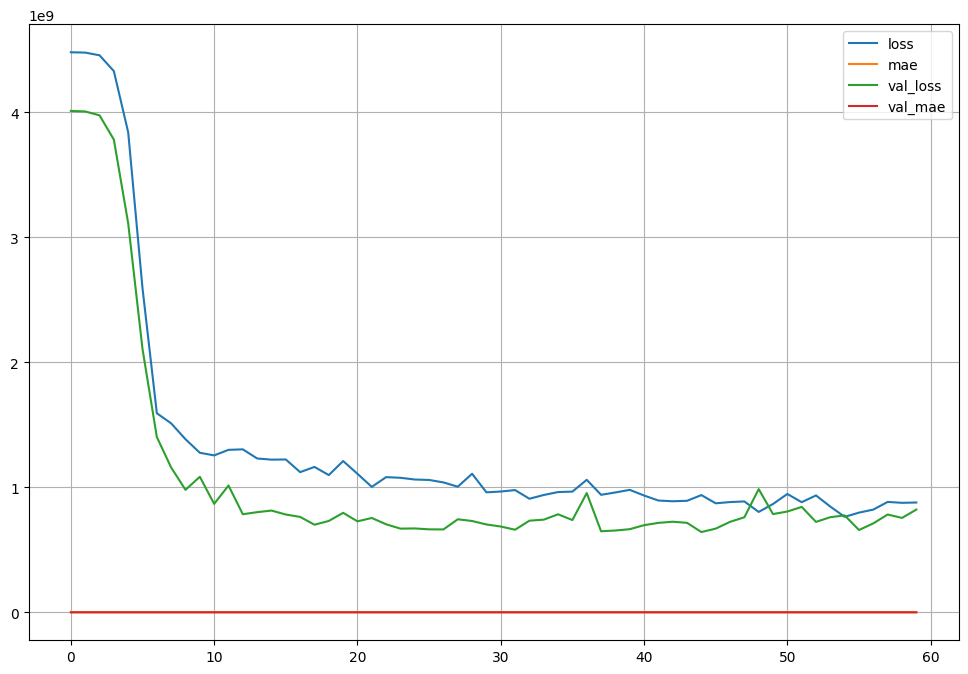

Testing set Mean Abs Error: 11815.16
Loss                   :  642120768.0
Mean Absolute Error    :  11815.1552734375


In [423]:
from sklearn import metrics 
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("Testing set Mean Abs Error: {:7.2f}".format(mae))
model_evaluate = model.evaluate(X_test_processed, y_test, verbose=0)
print("Loss                   : ", model_evaluate[0])
print("Mean Absolute Error    : ", model_evaluate[1])

In [424]:
# Comparison of the actual results with the predicted results
predicted = model.predict(X_test_processed)  # Make sure to use processed data

# Model evaluation
print("Mean Absolute Error    : ", metrics.mean_absolute_error(y_test, predicted))  
print("Mean Squared Error     : ", metrics.mean_squared_error(y_test, predicted))  
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("r2_score              : ", metrics.r2_score(y_test, predicted))

print("-----------------------------------------------------------------------")
# Create DataFrame without flatten() for y_test (it's already a Series)
df_data = pd.DataFrame({
    "Actual": y_test,
    "Predicted": predicted.ravel()  # Use ravel() for the numpy array
})
print(df_data.head(15))
print("-----------------------------------------------------------------------")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Absolute Error    :  11815.154296875
Mean Squared Error     :  642120768.0
Root Mean Squared Error:  25340.101972959776
r2_score              :  0.7778567671775818
-----------------------------------------------------------------------
      Actual      Predicted
3965   12000   15283.489258
2917   32000   25690.880859
1741   15000   13403.145508
2978   29000   48422.941406
1498    8000    6242.960449
949    40000   22206.892578
1321   34999   48901.234375
3936   45000   19852.621094
1162  150000  169560.718750
4638   15000   19594.757812
4178   14000   34721.160156
4467    9000    8720.719727
1897   65000   39727.839844
2877    9000   13895.911133
1113  300000  374013.468750
-----------------------------------------------------------------------
